In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# 1. Loading and Preprocessing

In [3]:
# Load the dataset

df = pd.read_csv('CarPrice_Assignment.csv')

In [5]:
# Preview the dataset

print("Dataset preview:")
df.head()

Dataset preview:


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [7]:
# Check for missing values

print("\nMissing values in each column:")
df.isnull().sum()


Missing values in each column:


car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [9]:
# Drop irrelevant columns (if any)

# Drop car_id if it doesn't contribute to regression
if 'car_ID' in df.columns:
    df.drop(columns=['car_ID'], inplace=True)

In [11]:
# Encoding categorical variables (if any)

df = pd.get_dummies(df, drop_first=True)

In [13]:
# Feature scaling
scaler = StandardScaler()
X = df.drop('price', axis=1)
y = df['price']
X_scaled = scaler.fit_transform(X)

In [15]:
# Splitting dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


# 2. Model Implementation

In [17]:
# Initialize regression models

models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "Support Vector Regressor": SVR()
}

In [19]:
# Train and evaluate each model
model_performance = []
for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Evaluate performance
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    model_performance.append((name, r2, mse, mae))

    print(f"{name} Performance:")
    print(f"R-squared: {r2:.4f}")
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"Mean Absolute Error: {mae:.4f}")


Training Linear Regression...
Linear Regression Performance:
R-squared: -31650981667885770354982912.0000
Mean Squared Error: 2498655757651236794056222502289408.0000
Mean Absolute Error: 30899709266986604.0000

Training Decision Tree...
Decision Tree Performance:
R-squared: 0.8559
Mean Squared Error: 11376015.6135
Mean Absolute Error: 2200.1423

Training Random Forest...
Random Forest Performance:
R-squared: 0.9533
Mean Squared Error: 3682803.2185
Mean Absolute Error: 1367.3156

Training Gradient Boosting...
Gradient Boosting Performance:
R-squared: 0.9308
Mean Squared Error: 5463056.2200
Mean Absolute Error: 1696.8629

Training Support Vector Regressor...
Support Vector Regressor Performance:
R-squared: -0.1021
Mean Squared Error: 87001508.9811
Mean Absolute Error: 5707.0130


# 3. Model Evaluation

In [21]:
# Create a DataFrame to compare results

performance_df = pd.DataFrame(model_performance, columns=["Model", "R-squared", "MSE", "MAE"])
performance_df = performance_df.sort_values(by="R-squared", ascending=False)

print("\nModel Performance Comparison:")
print(performance_df)


Model Performance Comparison:
                      Model     R-squared           MSE           MAE
2             Random Forest  9.533492e-01  3.682803e+06  1.367316e+03
3         Gradient Boosting  9.307984e-01  5.463056e+06  1.696863e+03
1             Decision Tree  8.558977e-01  1.137602e+07  2.200142e+03
4  Support Vector Regressor -1.020658e-01  8.700151e+07  5.707013e+03
0         Linear Regression -3.165098e+25  2.498656e+33  3.089971e+16


C:\Users\vayal\AppData\Local\Temp\ipykernel_10440\2079656924.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=performance_df, x="R-squared", y="Model", palette="viridis")


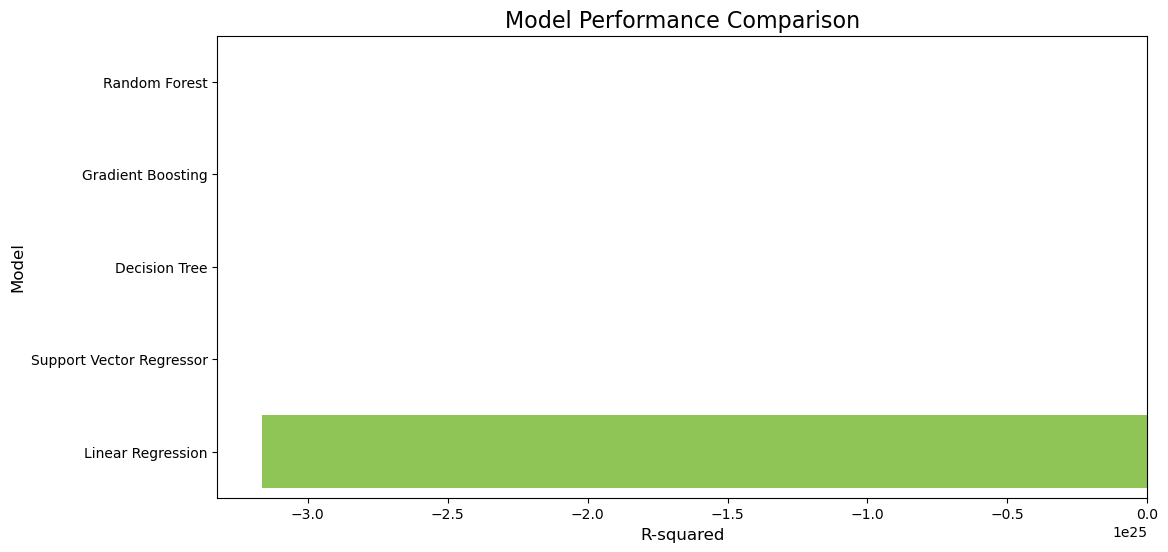

In [34]:
# Visualization

plt.figure(figsize=(12, 6))
sns.barplot(data=performance_df, x="R-squared", y="Model", palette="viridis")
plt.title("Model Performance Comparison", fontsize=16)
plt.xlabel("R-squared", fontsize=12)
plt.ylabel("Model", fontsize=12)
plt.show()

In [23]:
# Identify best and worst models

best_model_name = performance_df.iloc[0]['Model']
print(f"\nBest Performing Model: {best_model_name}")


Best Performing Model: Random Forest


# 4. Feature Importance Analysis


Feature Importance:
                         Feature  Importance
6                     enginesize    0.540808
5                     curbweight    0.294927
13                    highwaympg    0.043387
10                    horsepower    0.038275
3                       carwidth    0.013358
..                           ...         ...
142     CarName_vokswagen rabbit    0.000000
91           CarName_nissan note    0.000000
118          CarName_subaru baja    0.000000
55   CarName_honda civic 1500 gl    0.000000
147    CarName_volkswagen rabbit    0.000000

[189 rows x 2 columns]


C:\Users\vayal\AppData\Local\Temp\ipykernel_5016\2145102746.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importances.head(10), x="Importance", y="Feature", palette="viridis")


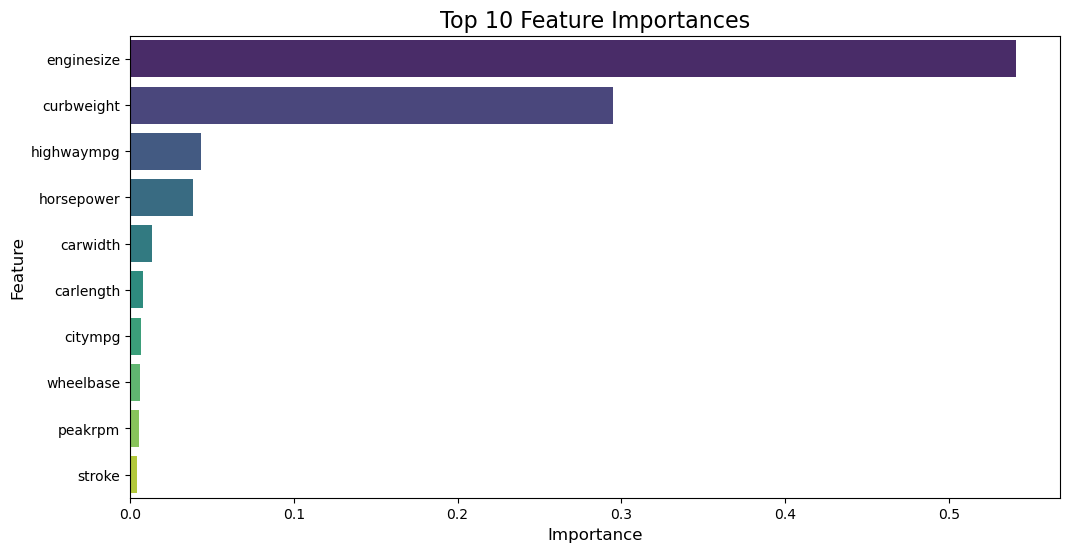

In [25]:
# For tree-based models, extract feature importances
if best_model_name in ["Random Forest", "Gradient Boosting", "Decision Tree"]:
    best_model = models[best_model_name]
    feature_importances = pd.DataFrame({
        'Feature': X.columns,
        'Importance': best_model.feature_importances_
    }).sort_values(by='Importance', ascending=False)

    print("\nFeature Importance:")
    print(feature_importances)

    # Plot feature importances
    plt.figure(figsize=(12, 6))
    sns.barplot(data=feature_importances.head(10), x="Importance", y="Feature", palette="viridis")
    plt.title("Top 10 Feature Importances", fontsize=16)
    plt.xlabel("Importance", fontsize=12)
    plt.ylabel("Feature", fontsize=12)
    plt.show()

# 5. Hyperparameter Tuning

In [28]:
# Hyperparameter tuning for Random Forest
if best_model_name == "Random Forest":
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
    grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='r2', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    print("\nBest Hyperparameters for Random Forest:")
    print(grid_search.best_params_)



Best Hyperparameters for Random Forest:
{'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}


In [32]:
    # Evaluate the tuned model
    tuned_model = grid_search.best_estimator_
    y_tuned_pred = tuned_model.predict(X_test)
    tuned_r2 = r2_score(y_test, y_tuned_pred)
    print(f"\nTuned Model R-squared: {tuned_r2:.4f}")


Tuned Model R-squared: 0.9544


In [36]:
# Save results for submission
performance_df.to_csv('Car_Price_Model_Performance.csv', index=False)
